In [97]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
import os
import cv2

from PIL import Image

### 이미지 데이터 읽기 (그림판 작업된 파일)

In [2]:
os.listdir('./OX dataset')

['O', 'X']

In [39]:
base_path = './OX dataset'
o_path = '/O/'
x_path = '/X/'

In [54]:
o_list = []
x_list = []

for file in os.listdir(base_path+o_path):
    o_list.append(base_path + o_path + file)
    
for file in os.listdir(base_path+x_path):
    x_list.append(base_path + x_path + file)

In [55]:
o_list

['./OX dataset/O/10_HJ.jpg',
 './OX dataset/O/10_JT.jpg',
 './OX dataset/O/10_Taek.png',
 './OX dataset/O/1_HJ.jpg',
 './OX dataset/O/1_JT.jpg',
 './OX dataset/O/1_Taek.png',
 './OX dataset/O/2_HJ.jpg',
 './OX dataset/O/2_JT.jpg',
 './OX dataset/O/2_Taek.png',
 './OX dataset/O/3_HJ.jpg',
 './OX dataset/O/3_JT.jpg',
 './OX dataset/O/3_Taek.png',
 './OX dataset/O/4_HJ.jpg',
 './OX dataset/O/4_JT.jpg',
 './OX dataset/O/4_Taek.png',
 './OX dataset/O/5_HJ.jpg',
 './OX dataset/O/5_JT.jpg',
 './OX dataset/O/5_Taek.png',
 './OX dataset/O/6_HJ.jpg',
 './OX dataset/O/6_JT.jpg',
 './OX dataset/O/6_Taek.png',
 './OX dataset/O/7_HJ.jpg',
 './OX dataset/O/7_JT.jpg',
 './OX dataset/O/7_Taek.png',
 './OX dataset/O/8_HJ.jpg',
 './OX dataset/O/8_JT.jpg',
 './OX dataset/O/8_Taek.png',
 './OX dataset/O/9_HJ.jpg',
 './OX dataset/O/9_JT.jpg',
 './OX dataset/O/9_Taek.png',
 './OX dataset/O/O01_Sam.jpg',
 './OX dataset/O/O02_Sam.jpg',
 './OX dataset/O/O03_Sam.jpg',
 './OX dataset/O/O04_Sam.jpg',
 './OX datase

In [56]:
x_list

['./OX dataset/X/10_HJ.jpg',
 './OX dataset/X/10_JT.jpg',
 './OX dataset/X/10_Taek.png',
 './OX dataset/X/1_HJ.jpg',
 './OX dataset/X/1_JT.jpg',
 './OX dataset/X/1_Taek.png',
 './OX dataset/X/2_HJ.jpg',
 './OX dataset/X/2_JT.jpg',
 './OX dataset/X/2_Taek.png',
 './OX dataset/X/3_HJ.jpg',
 './OX dataset/X/3_JT.jpg',
 './OX dataset/X/3_Taek.png',
 './OX dataset/X/4_HJ.jpg',
 './OX dataset/X/4_JT.jpg',
 './OX dataset/X/4_Taek.png',
 './OX dataset/X/5_HJ.jpg',
 './OX dataset/X/5_JT.jpg',
 './OX dataset/X/5_Taek.png',
 './OX dataset/X/6_HJ.jpg',
 './OX dataset/X/6_JT.jpg',
 './OX dataset/X/6_Taek.png',
 './OX dataset/X/7_HJ.jpg',
 './OX dataset/X/7_JT.jpg',
 './OX dataset/X/7_Taek.png',
 './OX dataset/X/8_HJ.jpg',
 './OX dataset/X/8_JT.jpg',
 './OX dataset/X/8_Taek.png',
 './OX dataset/X/9_HJ.jpg',
 './OX dataset/X/9_JT.jpg',
 './OX dataset/X/9_Taek.png',
 './OX dataset/X/X01_Sam.jpg',
 './OX dataset/X/X02_Sam.jpg',
 './OX dataset/X/X03_Sam.jpg',
 './OX dataset/X/X04_Sam.jpg',
 './OX datase

In [58]:
o_pltlist = random.choices(o_list, k=3)
x_pltlist = random.choices(x_list, k=3)

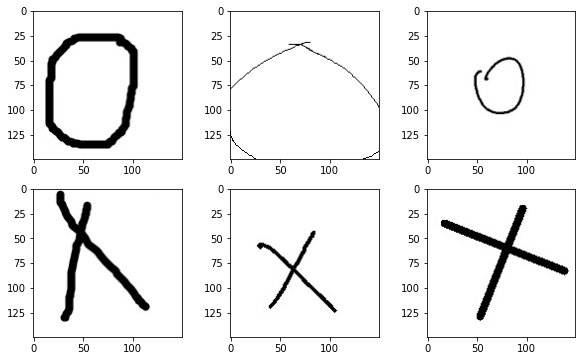

In [59]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for i in range(3):
    img = Image.open(o_pltlist[i])
    ax[0,i].imshow(img)
    
    img = Image.open(x_pltlist[i])
    ax[1,i].imshow(img)
        
plt.show()

### 데이터 정리하기

In [99]:
data =  []

for file in o_list :
    data.append([cv2.imread(file, cv2.IMREAD_GRAYSCALE),1])
    
for file in x_list :
    data.append([cv2.imread(file, cv2.IMREAD_GRAYSCALE),0])

In [184]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
x_data = []
y_data = []

for i in range(len(data)) :
    x_data.append(data[i][0])
    y_data.append(data[i][1])

In [154]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [155]:
X_train, X_test, y_train, y_test =  train_test_split(x_data, y_data, test_size=0.2)

In [156]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

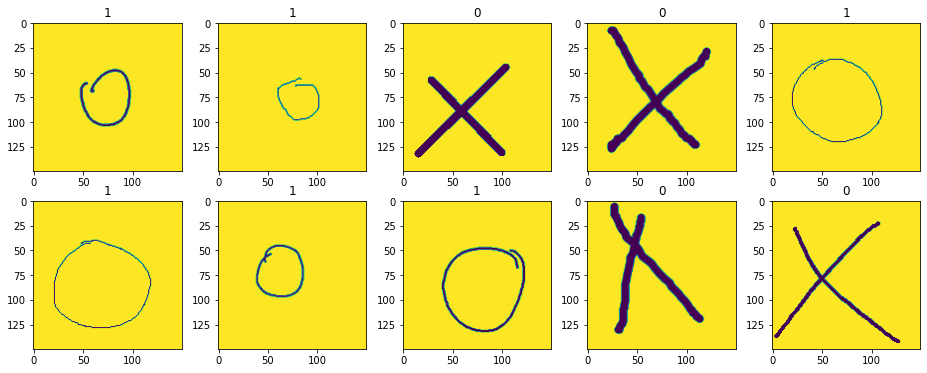

In [157]:
fig, ax = plt.subplots(2,5, figsize=(16,6))

for j in range(2) :
    for i in range(5) :
        idx = random.randrange(len(X_train))
        ax[j, i].imshow(X_train[idx])
        ax[j, i].set_title(y_train[idx])

### 모델 구성, 학습

In [158]:
input_img = keras.Input(shape=(150,150,1), name='Images')
x = layers.Conv2D(32, (3, 3), activation='relu')(input_img)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
output_img = layers.MaxPooling2D((2,2))(x)

x = layers.Flatten()(output_img)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs = input_img, outputs = output, name = 'OX_classification')

In [159]:
model.summary()

Model: "OX_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Images (InputLayer)         [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 82944)       

In [163]:
model.compile(optimizer = 'adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [164]:
X_train = X_train.reshape(-1, 150, 150, 1)
X_test = X_test.reshape(-1, 150, 150, 1)

In [165]:
history = model.fit(X_train, y_train, epochs=4, batch_size=20)

Epoch 1/4
4/4 [==============================] - 12s 64ms/step - loss: 326.7832 - accuracy: 0.5312
Epoch 2/4
4/4 [==============================] - 0s 12ms/step - loss: 72.9504 - accuracy: 0.5781
Epoch 3/4
4/4 [==============================] - 0s 12ms/step - loss: 5.6870 - accuracy: 0.7812
Epoch 4/4
4/4 [==============================] - 0s 12ms/step - loss: 3.3177 - accuracy: 0.8281


### 정확도"

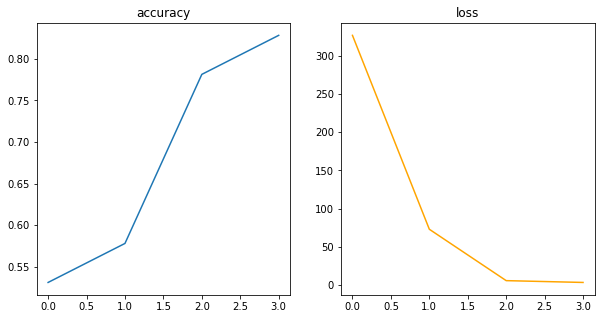

In [181]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history.history['loss'], c='orange')
ax[1].set_title('loss')
plt.show()

In [182]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 433ms/step - loss: 4.8608e-27 - accuracy: 1.0000


[4.860755208653814e-27, 1.0]

In [188]:
prediction = (model.predict(X_test)>0.5).astype('int32')

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

[[7 0]
 [0 9]]


---

### 이미지 데이터 읽기( 종이에 쓴 파일)

In [189]:
os.listdir()

['.ipynb_checkpoints',
 '20220902_coding_test4.ipynb',
 '220902_코딩테스트.pptx',
 'archive.zip',
 'Deeplearning_16_MNIST.ipynb',
 'Deeplearning_17_Maskman',
 'Deeplearning_17_MaskMan.ipynb',
 'Deeplearning_20_maskman_excercise.ipynb',
 'Deeplearning_25_OX_classification.ipynb',
 'Deeplearning_8_CNN.ipynb',
 'Deeplearning_9_scratch.ipynb',
 'MNIST_CNN_model.h5',
 'OX dataset',
 'OX dataset-20220914T011215Z-001.zip',
 'pytorch_1.ipynb',
 'pytorch_2.ipynb',
 'pytorch_3_미분.ipynb',
 'pytorch_4_linear_regression.ipynb',
 'tensorflow_1_constant.ipynb',
 'tensorflow_2_Variable.ipynb',
 'tensorflow_3_Tensor연산.ipynb',
 'tensorflow_4_자동미분.ipynb',
 'tensorflow_5_linear regression.ipynb',
 'tensorflow_6_perceptron.ipynb']

In [255]:
path = './OX dataset'
img_o_path = '/imageO/'
img_x_path = '/imageX/'
img_o = os.listdir(path+img_o_path)
img_x = os.listdir(path+img_x_path)
img_o_list = []
img_x_list = []

for file in img_o :
    img_o_list.append(path+img_o_path+file)
    
for file in img_x :
    img_x_list.append(path+img_x_path+file)
    
img_o_list

['./OX dataset/imageO/1.jpg',
 './OX dataset/imageO/10.jpg',
 './OX dataset/imageO/11.jpg',
 './OX dataset/imageO/12.jpg',
 './OX dataset/imageO/13.jpg',
 './OX dataset/imageO/14.jpg',
 './OX dataset/imageO/15.jpg',
 './OX dataset/imageO/16.jpg',
 './OX dataset/imageO/17.jpg',
 './OX dataset/imageO/18.jpg',
 './OX dataset/imageO/2.jpg',
 './OX dataset/imageO/20.jpg',
 './OX dataset/imageO/21.jpg',
 './OX dataset/imageO/22.jpg',
 './OX dataset/imageO/23.jpg',
 './OX dataset/imageO/24.jpg',
 './OX dataset/imageO/25.jpg',
 './OX dataset/imageO/26.jpg',
 './OX dataset/imageO/27.jpg',
 './OX dataset/imageO/28.jpg',
 './OX dataset/imageO/29.jpg',
 './OX dataset/imageO/3.jpg',
 './OX dataset/imageO/30.jpg',
 './OX dataset/imageO/31.jpg',
 './OX dataset/imageO/32.jpg',
 './OX dataset/imageO/33.jpg',
 './OX dataset/imageO/34.jpg',
 './OX dataset/imageO/35.jpg',
 './OX dataset/imageO/36.jpg',
 './OX dataset/imageO/37.jpg',
 './OX dataset/imageO/38.jpg',
 './OX dataset/imageO/39.jpg',
 './OX data

### 데이터 정리하기

In [256]:
data = []
image_size = 150

for file in img_o_list :
    data.append([cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), (image_size, image_size)),1])
    
for file in img_x_list :
    data.append([cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), (image_size, image_size)),0])
    

In [257]:
random.shuffle(data)

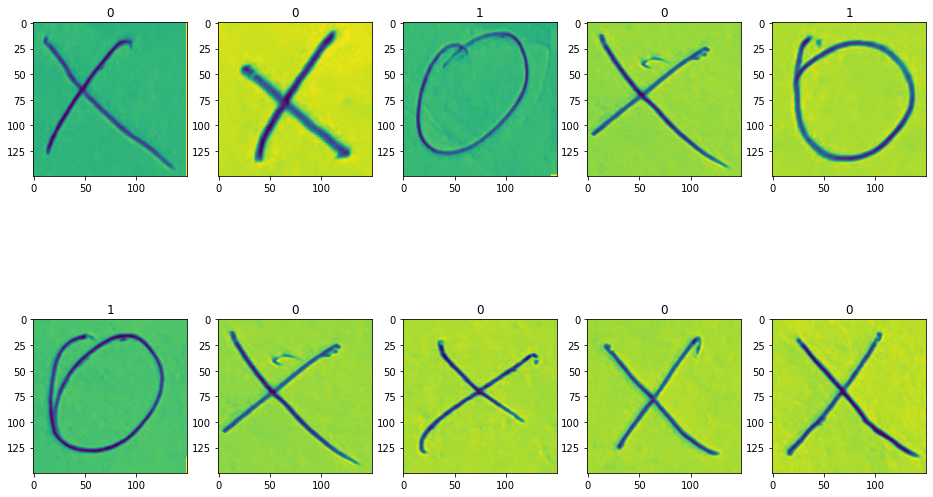

In [258]:
fig, ax = plt.subplots(2,5, figsize=(16,10))

for i in range(2) :
    for j in range(5) :
        idx = random.randrange(len(data))
        ax[i, j].imshow(data[idx][0])
        ax[i, j].set_title(data[idx][1])

In [259]:
X_test_hand = []
y_test_hand = []

for d in data :
    X_test_hand.append(d[0])
    y_test_hand.append(d[1])

In [260]:
X_test_hand = np.array(X_test_hand)
y_test_hand = np.array(y_test_hand)

In [261]:
X_test_hand.shape

(78, 150, 150)

In [262]:
X_test_hand = X_test_hand.reshape(-1,150,150,1)

In [263]:
y_test_hand = y_test_hand.reshape(-1,1)

### 모델에 넣고 분류하기

In [264]:
model.evaluate(np.array(X_test_hand), np.array(y_test_hand))

3/3 [==============================] - 1s 56ms/step - loss: 1.4838 - accuracy: 0.8846


[1.4837977886199951, 0.8846153616905212]

In [265]:
prediction = (model.predict(X_test_hand) > 0.5).astype('int32')

print(classification_report(y_test_hand, prediction))
print(confusion_matrix(y_test_hand, prediction))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        39
           1       0.81      1.00      0.90        39

    accuracy                           0.88        78
   macro avg       0.91      0.88      0.88        78
weighted avg       0.91      0.88      0.88        78

[[30  9]
 [ 0 39]]


In [266]:
wrong_result = []

for n in range(0, len(y_test_hand)) :
    if prediction[n] != y_test_hand[n] :
        wrong_result.append(n)
        
print(wrong_result)

[12, 21, 37, 40, 53, 60, 64, 73, 77]


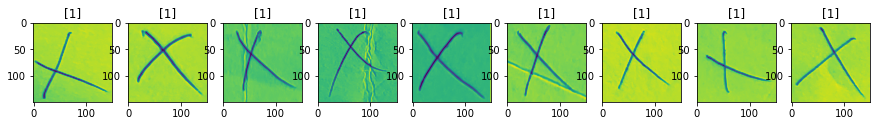

In [268]:
fig, ax = plt.subplots(1, len(wrong_result), figsize=(15,20))
for cnt, idx in enumerate(wrong_result) :
    ax[cnt].imshow(X_test_hand[idx])
    ax[cnt].set_title(prediction[idx])
    

---

### 이미지 전처리

C:\Users\story\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

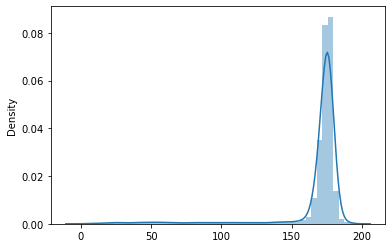

In [274]:
import seaborn as sns

sns.distplot(X_test_hand[0])

In [275]:
X_test_hand[0].min()

0

In [277]:
X_test_hand[0].max()

195

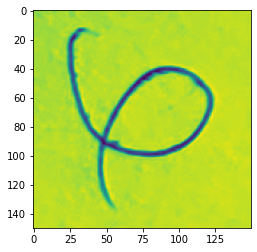

In [278]:
plt.imshow(X_test_hand[0])

In [279]:
X_test_hand.shape

(78, 150, 150, 1)

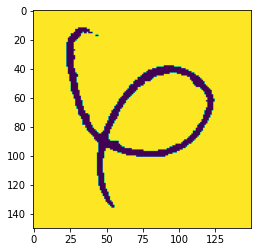

In [287]:
threshold = 150

ret, img = cv2.threshold(X_test_hand[0], 150, 255, cv2.THRESH_BINARY)
plt.imshow(img)

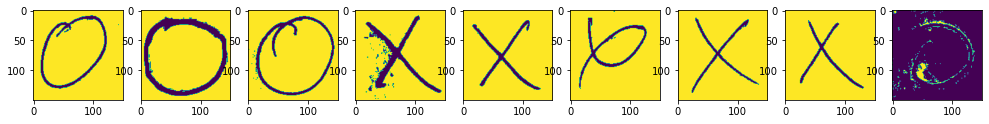

In [300]:
fig, ax = plt.subplots(1, 9, figsize=(17, 20))

for idx in range(9) :
    data = random.choice(X_test_hand)
    ret, img = cv2.threshold(data, 150, 255, cv2.THRESH_BINARY)
    ax[idx].imshow(img)
    
plt.show()

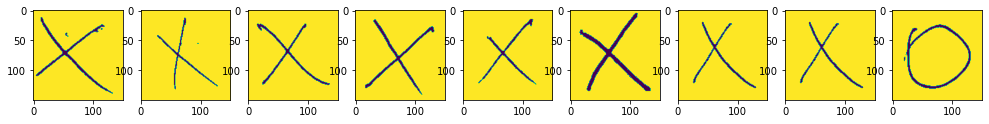

In [305]:
fig, ax = plt.subplots(1, 9, figsize=(17, 20))

for idx in range(9) :
    data = random.choice(X_test_hand)
    ret, img = cv2.threshold(data, 100, 255, cv2.THRESH_BINARY)
    ax[idx].imshow(img)
    
plt.show()

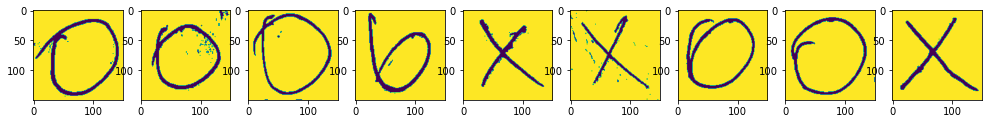

In [315]:
for idx, data in enumerate(X_test_hand) :
#     print('data : ',data)
    ret, img = cv2.threshold(data, 50, 255, cv2.THRESH_BINARY)
    img = img.reshape(-1,150,150,1)
#     print('img : ',img)
    X_test_hand[idx] = img
    
fig, ax = plt.subplots(1,9, figsize=(17,20))
    
for idx in range(9) :
    ax[idx].imshow(random.choice(X_test_hand))
    
plt.show()

In [316]:
model.evaluate(X_test_hand, y_test_hand)

3/3 [==============================] - 0s 26ms/step - loss: 2.0203 - accuracy: 0.8718


[2.020307779312134, 0.8717948794364929]

In [321]:
prediction = (model.predict(X_test_hand)>0.5).astype('int32')


print(classification_report(y_test_hand,prediction))
print(confusion_matrix(y_test_hand, prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.89      0.85      0.87        39

    accuracy                           0.87        78
   macro avg       0.87      0.87      0.87        78
weighted avg       0.87      0.87      0.87        78

[[35  4]
 [ 6 33]]


In [322]:
wrong_result = []

for n in range(0, len(y_test_hand)) :
    if prediction[n] != y_test_hand[n] :
        wrong_result.append(n)
        
print(wrong_result)

[10, 12, 13, 14, 15, 20, 37, 40, 66, 76]


C:\Users\story\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


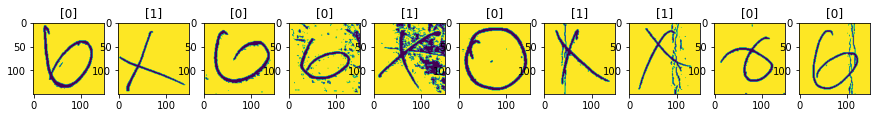

In [323]:
fig, ax = plt.subplots(1, len(wrong_result), figsize=(15,20))
for cnt, idx in enumerate(wrong_result) :
    ax[cnt].imshow(X_test_hand[idx])
    ax[cnt].set_title(prediction[idx])
    

---

### 이미지 전처리 ( Adaptive threshold )

In [454]:
base_path = './OX dataset'
o_path = '/O/'
x_path = '/X/'

o_list = []
x_list = []

for file in os.listdir(base_path+o_path):
    o_list.append(base_path + o_path + file)
    
for file in os.listdir(base_path+x_path):
    x_list.append(base_path + x_path + file)
    
data =  []

for file in o_list :
    data.append([cv2.imread(file, cv2.IMREAD_GRAYSCALE),1])
    
for file in x_list :
    data.append([cv2.imread(file, cv2.IMREAD_GRAYSCALE),0])
    
x_data = []
y_data = []

for i in range(len(data)) :
    x_data.append(data[i][0])
    y_data.append(data[i][1])
    
x_data = np.array(x_data)
y_data = np.array(y_data)

X_train, X_test, y_train, y_test =  train_test_split(x_data, y_data, test_size=0.2)

X_train = X_train.reshape(-1, 150, 150, 1)
X_test = X_test.reshape(-1, 150, 150, 1)

In [455]:
input_img = keras.Input(shape=(150,150,1), name='Images')
x = layers.Conv2D(12, (3, 3), activation='relu')(input_img)
x = layers.AveragePooling2D((2,2), strides=2)(x)
x = layers.Dropout(0.4)(x)
x = layers.Conv2D(36, (3, 3), activation='relu')(x)
x = layers.AveragePooling2D((2,2), strides=2)(x)
x = layers.Dropout(0.4)(x)
output_img = layers.Conv2D(64, (3, 3), activation='relu')(x)

x = layers.Flatten()(output_img)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs = input_img, outputs = output, name = 'OX_classification')

model.summary()

Model: "OX_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Images (InputLayer)         [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_46 (Conv2D)          (None, 148, 148, 12)      120       
                                                                 
 average_pooling2d_18 (Avera  (None, 74, 74, 12)       0         
 gePooling2D)                                                    
                                                                 
 dropout_11 (Dropout)        (None, 74, 74, 12)        0         
                                                                 
 conv2d_47 (Conv2D)          (None, 72, 72, 36)        3924      
                                                                 
 average_pooling2d_19 (Avera  (None, 36, 36, 36)       0         
 gePooling2D)                                    

Epoch 1/13
13/13 [==============================] - 1s 26ms/step - loss: 224.3044 - accuracy: 0.4688
Epoch 2/13
13/13 [==============================] - 0s 6ms/step - loss: 2.3451 - accuracy: 0.5000
Epoch 3/13
13/13 [==============================] - 0s 6ms/step - loss: 0.6021 - accuracy: 0.6406
Epoch 4/13
13/13 [==============================] - 0s 6ms/step - loss: 0.6030 - accuracy: 0.6719
Epoch 5/13
13/13 [==============================] - 0s 7ms/step - loss: 0.5238 - accuracy: 0.7500
Epoch 6/13
13/13 [==============================] - 0s 6ms/step - loss: 0.4669 - accuracy: 0.8281
Epoch 7/13
13/13 [==============================] - 0s 6ms/step - loss: 0.3659 - accuracy: 0.8438
Epoch 8/13
13/13 [==============================] - 0s 6ms/step - loss: 0.2197 - accuracy: 0.9219
Epoch 9/13
13/13 [==============================] - 0s 6ms/step - loss: 0.1256 - accuracy: 0.9219
Epoch 10/13
13/13 [==============================] - 0s 6ms/step - loss: 0.1830 - accuracy: 0.9219
Epoch 11/13
13/1

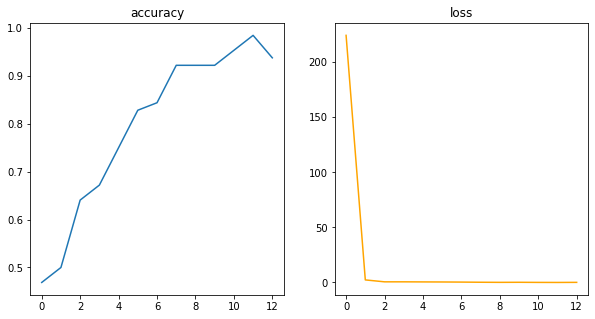

In [456]:
model.compile(optimizer = 'adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=13, batch_size=5)

fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history.history['loss'], c='orange')
ax[1].set_title('loss')
plt.show()

In [460]:
path = './OX dataset'
img_o_path = '/imageO/'
img_x_path = '/imageX/'
img_o = os.listdir(path+img_o_path)
img_x = os.listdir(path+img_x_path)
img_o_list = []
img_x_list = []

for file in img_o :
    img_o_list.append(path+img_o_path+file)
    
for file in img_x :
    img_x_list.append(path+img_x_path+file)
    
data = []
image_size = 150

for file in img_o_list :
    data.append([cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), (image_size, image_size)),1])
    
for file in img_x_list :
    data.append([cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), (image_size, image_size)),0])
    
random.shuffle(data)

X_test_hand = []
y_test_hand = []

for d in data :
    X_test_hand.append(d[0])
    y_test_hand.append(d[1])
    
X_test_hand = np.array(X_test_hand)
y_test_hand = np.array(y_test_hand)

X_test_hand = X_test_hand.reshape(-1,150,150,1)

In [458]:
for idx, data in enumerate(X_test_hand) :
    ret, img = cv2.threshold(data, 50, 255, cv2.THRESH_BINARY)
    img = img.reshape(-1,150,150,1)
    X_test_hand[idx] = img
    
model.evaluate(X_test_hand, y_test_hand)

prediction = (model.predict(X_test_hand)>0.5).astype('int32')


print(classification_report(y_test_hand,prediction))
print(confusion_matrix(y_test_hand, prediction))

3/3 [==============================] - 0s 56ms/step - loss: 0.2823 - accuracy: 0.9359
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.93      0.95      0.94        39

    accuracy                           0.94        78
   macro avg       0.94      0.94      0.94        78
weighted avg       0.94      0.94      0.94        78

[[36  3]
 [ 2 37]]


[1, 9, 51, 57, 62]


C:\Users\story\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


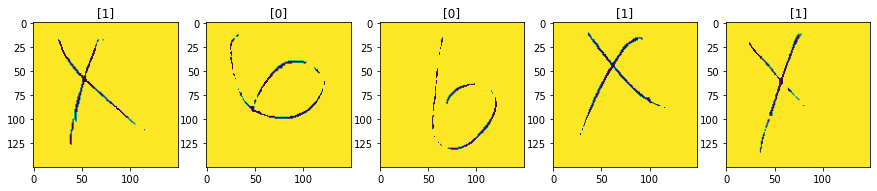

In [459]:
wrong_result = []

for n in range(0, len(y_test_hand)) :
    if prediction[n] != y_test_hand[n] :
        wrong_result.append(n)
        
print(wrong_result)

fig, ax = plt.subplots(1, len(wrong_result), figsize=(15,20))
for cnt, idx in enumerate(wrong_result) :
    ax[cnt].imshow(X_test_hand[idx])
    
    ax[cnt].set_title(prediction[idx])
    

---

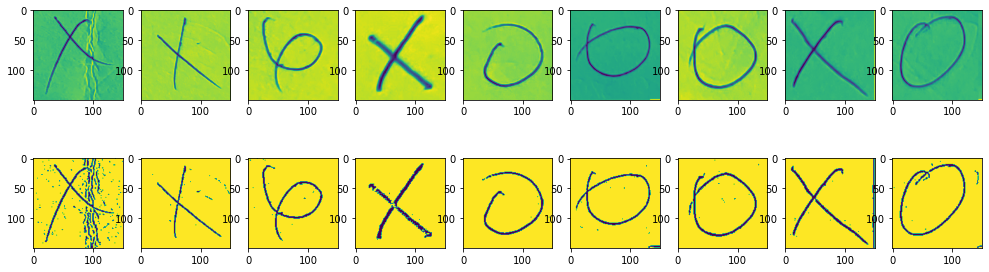

In [461]:
fig, ax = plt.subplots(2,9, figsize=(17,5))

tmp_img = []

for idx, data in enumerate(X_test_hand) :
    img_before = data.copy()
    img = cv2.adaptiveThreshold(data, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 7)
    if idx<9 :
        tmp_img.append([img_before,img])
    img = img.reshape(-1,150,150,1)
    X_test_hand[idx] = img
    

    
for idx in range(9) :
    ax[0, idx].imshow(tmp_img[idx][0])
    ax[1, idx].imshow(tmp_img[idx][1])
    
plt.show()

In [462]:
# for idx, data in enumerate(X_test_hand) :
#     img = cv2.adaptiveThreshold(data, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)
#     img = img.reshape(-1,150,150,1)
#     X_test_hand[idx] = img
    
model.evaluate(X_test_hand, y_test_hand)

prediction = (model.predict(X_test_hand)>0.5).astype('int32')


print(classification_report(y_test_hand,prediction))
print(confusion_matrix(y_test_hand, prediction))

3/3 [==============================] - 0s 63ms/step - loss: 0.1714 - accuracy: 0.9615
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.95      0.97      0.96        39

    accuracy                           0.96        78
   macro avg       0.96      0.96      0.96        78
weighted avg       0.96      0.96      0.96        78

[[37  2]
 [ 1 38]]


[0, 2, 55]


C:\Users\story\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


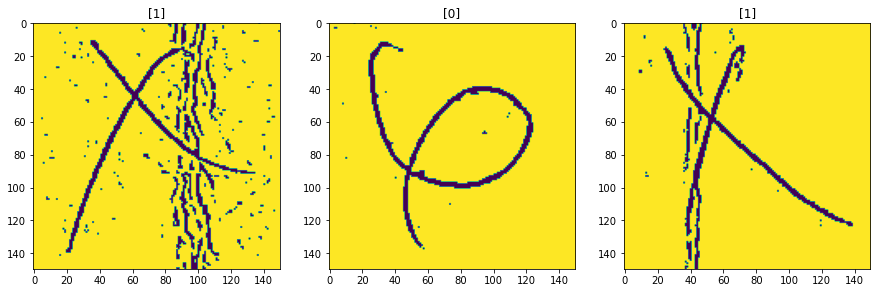

In [463]:
wrong_result = []

for n in range(0, len(y_test_hand)) :
    if prediction[n] != y_test_hand[n] :
        wrong_result.append(n)
        
print(wrong_result)

fig, ax = plt.subplots(1, len(wrong_result), figsize=(15,20))
for cnt, idx in enumerate(wrong_result) :
    ax[cnt].imshow(X_test_hand[idx])
    ax[cnt].set_title(prediction[idx])
    

---

### 이미지 혼합

In [375]:
base_path = './OX dataset'
o_path = '/O/'
x_path = '/X/'
img_o_path = '/imageO/'
img_x_path = '/imageX/'

data = []

o_list = []
x_list = []
img_o_list = []
img_x_list = []

image_size = 150

for file in os.listdir(base_path+o_path):
    o_list.append(base_path + o_path + file)
    
for file in os.listdir(base_path+x_path):
    x_list.append(base_path + x_path + file)
    
for file in os.listdir(base_path+img_o_path) :
    o_list.append(base_path+img_o_path+file)
    
for file in os.listdir(base_path+img_x_path) :
    x_list.append(base_path+img_x_path+file)
    
data =  []

for file in o_list :
    img = cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), (image_size, image_size))
    img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 9)
    data.append([img,1])
    
for file in x_list :
    img = cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), (image_size, image_size))
    img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 9)
    data.append([img,0])

random.shuffle(data)    

x_data = []
y_data = []

for i in range(len(data)) :
    x_data.append(data[i][0])
    y_data.append(data[i][1])
    
x_data = np.array(x_data)
x_data = x_data.reshape(-1,150,150,1)
y_data = np.array(y_data)

X_train, X_test, y_train, y_test =  train_test_split(x_data, y_data, test_size=0.2)

# X_train = X_train.reshape(-1, 150, 150, 1)
# X_test = X_test.reshape(-1, 150, 150, 1)

input_img = keras.Input(shape=(150,150,1), name='Images')
x = layers.Conv2D(6, (5, 5), activation='relu')(input_img)
x = layers.AveragePooling2D((2,2), strides=2)(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(12, (5, 5), activation='relu')(x)
x = layers.AveragePooling2D((2,2), strides=2)(x)
x = layers.Dropout(0.3)(x)
output_img = layers.Conv2D(24, (5, 5), activation='relu')(x)

x = layers.Flatten()(output_img)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs = input_img, outputs = output, name = 'OX_classification')

model.summary()

Model: "OX_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Images (InputLayer)         [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_32 (Conv2D)          (None, 146, 146, 6)       156       
                                                                 
 average_pooling2d_9 (Averag  (None, 73, 73, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout_2 (Dropout)         (None, 73, 73, 6)         0         
                                                                 
 conv2d_33 (Conv2D)          (None, 69, 69, 12)        1812      
                                                                 
 average_pooling2d_10 (Avera  (None, 34, 34, 12)       0         
 gePooling2D)                                    

Epoch 1/12
13/13 [==============================] - 1s 28ms/step - loss: 58.5481 - accuracy: 0.5397
Epoch 2/12
13/13 [==============================] - 0s 6ms/step - loss: 1.2717 - accuracy: 0.5476
Epoch 3/12
13/13 [==============================] - 0s 6ms/step - loss: 0.6177 - accuracy: 0.6905
Epoch 4/12
13/13 [==============================] - 0s 7ms/step - loss: 0.5064 - accuracy: 0.7302
Epoch 5/12
13/13 [==============================] - 0s 6ms/step - loss: 0.3945 - accuracy: 0.7698
Epoch 6/12
13/13 [==============================] - 0s 6ms/step - loss: 0.2637 - accuracy: 0.8730
Epoch 7/12
13/13 [==============================] - 0s 6ms/step - loss: 0.2028 - accuracy: 0.9127
Epoch 8/12
13/13 [==============================] - 0s 6ms/step - loss: 0.1755 - accuracy: 0.9444
Epoch 9/12
13/13 [==============================] - 0s 5ms/step - loss: 0.1428 - accuracy: 0.9444
Epoch 10/12
13/13 [==============================] - 0s 6ms/step - loss: 0.1292 - accuracy: 0.9365
Epoch 11/12
13/13

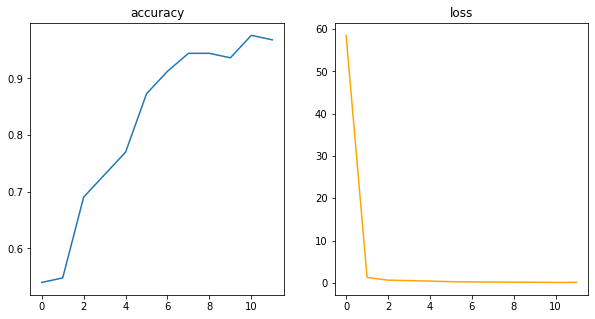

In [376]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=12, batch_size=10)

fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history['accuracy'])
ax[0].set_title('accuracy')
ax[1].plot(history.history['loss'], c='orange')
ax[1].set_title('loss')
plt.show()

In [377]:
model.evaluate(X_test, y_test)

prediction = (model.predict(X_test_hand)>0.5).astype('int32')


print(classification_report(y_test_hand,prediction))
print(confusion_matrix(y_test_hand, prediction))

1/1 [==============================] - 0s 156ms/step - loss: 0.3079 - accuracy: 0.8125
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        39

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

[[39  0]
 [ 0 39]]


[17]


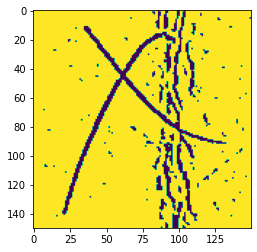

In [371]:
wrong_result = []

for n in range(0, len(y_test_hand)) :
    if prediction[n] != y_test_hand[n] :
        wrong_result.append(n)
        
print(wrong_result)

for cnt, idx in enumerate(wrong_result) :
    plt.imshow(X_test_hand[idx])
#     plt.set_title(prediction[idx])
    
plt.show()

In [366]:
    
model.evaluate(X_test_hand, y_test_hand)

prediction = (model.predict(X_test_hand)>0.5).astype('int32')


print(classification_report(y_test_hand,prediction))
print(confusion_matrix(y_test_hand, prediction))

3/3 [==============================] - 0s 36ms/step - loss: 0.0271 - accuracy: 0.9872
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.97      1.00      0.99        39

    accuracy                           0.99        78
   macro avg       0.99      0.99      0.99        78
weighted avg       0.99      0.99      0.99        78

[[38  1]
 [ 0 39]]


[17]


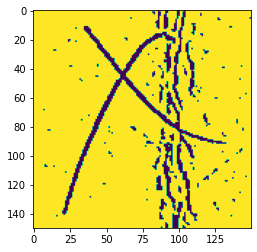

In [369]:
wrong_result = []

for n in range(0, len(y_test_hand)) :
    if prediction[n] != y_test_hand[n] :
        wrong_result.append(n)
        
print(wrong_result)

for cnt, idx in enumerate(wrong_result) :
    plt.imshow(X_test_hand[idx])
#     plt.set_title(prediction[idx])
    
plt.show()